# **SYSTEM RECOMMENDATION : MOBILE RECOMMENDATION SYSTEM**
## Nama : Ferdita Lusiana
## Email : lusianaferdita@gmail.com
## Sumber Dataset :
Dataset diperoleh dari kaggle dengan judul **Mobile Recommendation System Dataset** (https://www.kaggle.com/datasets/gyanprakashkushwaha/mobile-recommendation-system-dataset) dengan jumlah dataset 2546 data.

# **Proyek Overview**

Di era digital saat ini, konsumen memiliki begitu banyak pilihan dalam membeli smartphone, yang hadir dengan variasi spesifikasi teknis seperti kapasitas RAM, ukuran kamera, daya baterai, sistem operasi, dan kisaran harga yang sangat luas. Banyaknya pilihan ini seringkali membuat pengguna kesulitan dalam menentukan produk yang paling sesuai dengan kebutuhan dan preferensinya.

Proyek ini bertujuan untuk membangun sistem rekomendasi smartphone berbasis data yang dapat membantu pengguna dalam memilih smartphone terbaik berdasarkan spesifikasi dan ulasan pengguna. Dataset yang digunakan memuat informasi penting seperti nama produk, rating pengguna, harga, tautan gambar produk, serta deskripsi teknis (corpus) yang mencakup RAM, penyimpanan internal, baterai, kamera, dan sistem operasi.

# 💼 **Business Understanding**

## 🔍 **Problem Statements**
1. Bagaimana persebaran penggunaan smartphone berdasarkan nama smartphone dan rentang harga yang paling diminati pengguna?
2. Bagaimana performa nama dan model smartphone berdasarkan fitur teknis seperti storage/ram, OS/prosesor, kamera, display, jaringan, dan baterai dibandingkan dengan rating pengguna?
3. bagaimana spesifikasi teknis smartphone (corpus) mempengaruhi dalam menentukan rating smartphone di berbagai segmen harga?
4. Bagaimana cara membuat sistem rekomendasi smartphone yang optimal dan dapat diimplementasikan secara efektif?





## 🎯 **Goals**
1. Mengetahui persebaran dan popularitas smartphone berdasarkan merek dan segmen harga yang paling diminati pengguna.
2. Menganalisis performa smartphone dengan memvisualisasikan hubungan antara fitur teknis dan rating pengguna.
3. Mengevaluasi pengaruh spesifikasi teknis smartphone terhadap rating di berbagai kategori harga menggunakan visualisasi seperti heatmap dan scatterplot.
4. Mengembangkan sistem rekomendasi smartphone menggunakan algoritma content-based filtering dan collaborative filtering serta mengevaluasi performanya dengan metrik akurasi yang sesuai.


## 🛠️ **Solution Approach**
Untuk mencapai tujuan di atas, pendekatan berikut akan digunakan dalam analisis dan pengembangan sistem rekomendasi smartphone:
 1. Mengimplementasikan Exploratory Data Analysis (EDA) untuk analisis dan visualisasi data.
 2. Mengimplementasikan content-based filtering approach menggunakan algoritma cosine similarity.
 3. Mengimplementasikan collaborative-based filtering approach menggunakan algoritma deep learning.

# **Data Understanding**

## **Import Library**

Import Semua Library yang diperlukan

In [94]:
import os
import shutil
import zipfile
import re
from IPython.display import display
import textwrap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

In [56]:
#membuka zip menjadi folder
 with zipfile.ZipFile("/content/archive.zip", "r") as zip_ref:
  zip_ref.extractall("dataset")


#membaca csv dalam folder
data= pd.read_csv("/content/dataset/mobile_recommendation_system_dataset.csv")

# Display the first few rows
data.head()

,name,ratings,price,imgURL,corpus,user_id
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,RED0
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,OPP1
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,RED2
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,ONE3
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,APP4


### Deskripsi Variabel

Berikut adalag arti dari variabel-variabel dataset diatas

| **Nama Variabel** | **Tipe Data**  | **Deskripsi**                                                                             |
| ----------------- | -------------- | ----------------------------------------------------------------------------------------- |
| `name`            | String         | Nama lengkap smartphone beserta varian warna dan kapasitas penyimpanan.                   |
| `ratings`         | Float          | Nilai rating pengguna terhadap smartphone, biasanya dalam skala 1 hingga 5.               |
| `price`           | Integer/String | Harga smartphone. Perlu dibersihkan jika menggunakan simbol mata uang (misalnya `₹`).     |
| `imgURL`          | String (URL)   | Tautan gambar produk dari situs e-commerce.                                               |
| `corpus`          | String         | Deskripsi spesifikasi teknis (storage, RAM, OS, prosesor, kamera, dll) dalam bentuk teks. |
| `user_id`         | String         | ID unik pengguna atau penanda entri smartphone di dataset.                                |


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546 entries, 0 to 2545
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     2546 non-null   object 
 1   ratings  2546 non-null   float64
 2   price    2546 non-null   object 
 3   imgURL   2546 non-null   object 
 4   corpus   2534 non-null   object 
 5   user_id  2546 non-null   object 
dtypes: float64(1), object(5)
memory usage: 119.5+ KB


In [58]:
# Menampilkan jumlah baris dan kolom pada data
total_row, total_column = data.shape
print(f"Total of rows: {total_row}")
print(f"Total of column: {total_column}")

Total of rows: 2546
Total of column: 6


Dapat dilihat bahwa data yang digunakan adalah sebanyak 2546 data dengan 6 fitur dengan terdapat 1 variabel bertipe `float64`, 5 variabel bertipe `object`.

### Statistik Deskripsi dari Data

In [59]:
data.describe()

,ratings
count,2546.000000
mean,4.295797
std,0.214691
min,2.900000
25%,4.200000
50%,4.300000
75%,4.400000
max,5.000000


Tabel di atas memberikan informasi statistik pada masing-masing kolom, antara lain:
- Count adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi (mengukur seberapa tersebar data).
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama, yaitu nilai di bawah 25% data berada.
- 50% adalah kuartil kedua, juga disebut median (nilai tengah data).
- 75% adalah kuartil ketiga, yaitu nilai di bawah 75% data berada.
- Max adalah nilai maksimum

Penjelasan:

Dari tabel Data ratings menunjukkan distribusi yang cukup sempit dan condong ke arah nilai tinggi, yang mengindikasikan bahwa mayoritas pengguna memberikan penilaian positif terhadap item yang ada. Hal ini bisa menunjukkan kualitas produk/jasa yang baik atau bisa juga bias penilaian (rating bias).

In [60]:
# Menghapus simbol rupee dan koma, lalu mengonversi menjadi float
data['price'] = data['price'].replace('[₹,]', '', regex=True).astype(float)

# Cek hasil setelah dibersihkan
data['price'].head()

,price
0,23999.0
1,20999.0
2,13149.0
3,21999.0
4,3537.0


Dari hasil diatas menunjukan bahwa kolom price dengan simbol rupe dan koma dihapus dan mengonversi menjadi float.

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546 entries, 0 to 2545
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     2546 non-null   object 
 1   ratings  2546 non-null   float64
 2   price    2546 non-null   float64
 3   imgURL   2546 non-null   object 
 4   corpus   2534 non-null   object 
 5   user_id  2546 non-null   object 
dtypes: float64(2), object(4)
memory usage: 119.5+ KB


In [62]:
def extract_storage_ram(text):
    if isinstance(text, str):
        match = re.search(r'(\d+\s?GB\s?(RAM|Storage|ROM|internal|memory).*)', text, re.IGNORECASE)
        return match.group(1) if match else None

def extract_os_processor(text):
    if isinstance(text, str):
        match = re.search(r'(Android|iOS|Snapdragon|MediaTek|Exynos|Processor.*?)(,|\.|\n|$)', text, re.IGNORECASE)
        return match.group(1) if match else None

def extract_camera(text):
    if isinstance(text, str):
        match = re.search(r'(\d{1,3}\s?MP(?:\s?(?:rear|front|triple|dual)?\s?camera)?)', text, re.IGNORECASE)
        return match.group(1) if match else None

def extract_display(text):
    if isinstance(text, str):
        match = re.search(r'(\d+\.?\d*[-\s]?(inch|inches|\"|\sdisplay).*)', text, re.IGNORECASE)
        return match.group(1) if match else None

def extract_network(text):
    if isinstance(text, str):
        match = re.search(r'\b(5G|4G|3G|Dual SIM)\b', text, re.IGNORECASE)
        return match.group(1) if match else None

def extract_battery(text):
    if isinstance(text, str):
        match = re.search(r'Capacity\s*(\d{3,5})', text, re.IGNORECASE)
        return f"{match.group(1)} mAh" if match else None

# Terapkan ke DataFrame
data['storage_ram'] = data['corpus'].apply(extract_storage_ram)
data['os_processor'] = data['corpus'].apply(extract_os_processor)
data['camera'] = data['corpus'].apply(extract_camera)
data['display'] = data['corpus'].apply(extract_display)
data['network'] = data['corpus'].apply(extract_network)
data['battery'] = data['corpus'].apply(extract_battery)

# Tampilkan hasil dalam bentuk tabel (bukan print biasa)
display(data[['name', 'storage_ram', 'os_processor', 'camera', 'display', 'network', 'battery']].head(5))


,name,storage_ram,os_processor,camera,display,network,battery
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",128 GBRAM6 SystemAndroid 12Processor TypeMedi...,Processor TypeMediatek Dimensity 1080Processor...,50MP,5000 Display Size16.94 cm (6.67 inch)Resolutio...,5G,5000 mAh
1,"OPPO F11 Pro (Aurora Green, 128 GB)",128 GBRAM6 GBExpandable Storage256GB SystemAn...,Processor TypeMediaTek Helio P70 Octa Core 2,48MP,4000 Display Size16.51 cm (6.5 inch)Resolution...,3G,4000 mAh
2,"REDMI Note 11 (Starburst White, 64 GB)",64 GBRAM4 SystemAndroid 11Processor Speed2.4 ...,Processor Speed2,50MP,5000 Display Size16.33 cm (6.43 inch)Resolutio...,4G,5000 mAh
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",256 GBRAM12 SystemAndroid Q 11Processor TypeQ...,Processor TypeQualcomm Snapdragon Octa Core 75...,64MP,4500 Display Size16.33 cm (6.43 inch)Resolutio...,5G,4500 mAh
4,"APPLE iPhone 13 mini (Blue, 128 GB)",None,Processor TypeA15 Bionic Chip 12MP 12MP 12MP 6...,12MP,5.4 inch)Resolution2340 x 1080 PixelsResolutio...,5G,None


agar lebih mudah mengerti dataset maka kolom corpus dipisah menjadi 6 kolom yang terdiri dari storage_ram, os_processor, camera, display, network, dan battery tujuannya agar mudah mengecek apakah terjadi missing value, duplikasi, dan memudahkan visualisasi.

In [63]:
# Menampilkan data duplikat
data[data.duplicated]

,name,ratings,price,imgURL,corpus,user_id,storage_ram,os_processor,camera,display,network,battery


In [64]:
# Cek jumlah data sebelum menghapus duplikat
print("Jumlah data sebelum menghapus duplikat:", data.shape[0])

# Cek apakah ada data duplikat
duplicates = data[data.duplicated()]
print(f"Jumlah baris duplikat: {duplicates.shape[0]}")

Jumlah data sebelum menghapus duplikat: 2546
Jumlah baris duplikat: 0


Dari Hasil diatas terlihat bahwa tidak ada data yang terduplikasi.

In [65]:
# Mengecek missing velue
pd.DataFrame({'Nilai yang Kosong':data.isnull().sum()})

,Nilai yang Kosong
name,0
ratings,0
price,0
imgURL,0
corpus,12
user_id,0
storage_ram,426
os_processor,77
camera,12
display,12


Dari hasil diatas diketahui bahwa terdapat missing velue di 7 kolom yaitu corpus, storage_ram, os_processor, camera, display, network, dan battery.saya uraikan corpus untuk menangani jika terjadi data missing value dri tiap kriteria yang ada di corpus.

In [66]:
data = data.dropna()

code diatas untuk menghapus semua baris dalam DataFrame data yang mengandung nilai kosong (NaN).

In [67]:
# Menangani missing velue
pd.DataFrame({'Nilai yang Kosong':data.isnull().sum()})

,Nilai yang Kosong
name,0
ratings,0
price,0
imgURL,0
corpus,0
user_id,0
storage_ram,0
os_processor,0
camera,0
display,0


Dari Hasil diatas terlihat bahwa sudah tidak ada missing velue karena sudah ditangani.

In [68]:
data.shape

(1971, 12)

code diatas menunjukan bahwa dataset yang sudah di lakukan proses cleaning data ada 1971 data dan 12 kolom.

# **Exploratory Data Analysis (EDA)**

### Persebaran penggunaan smartphone berdasarkan nama smartphone dan rentang harga

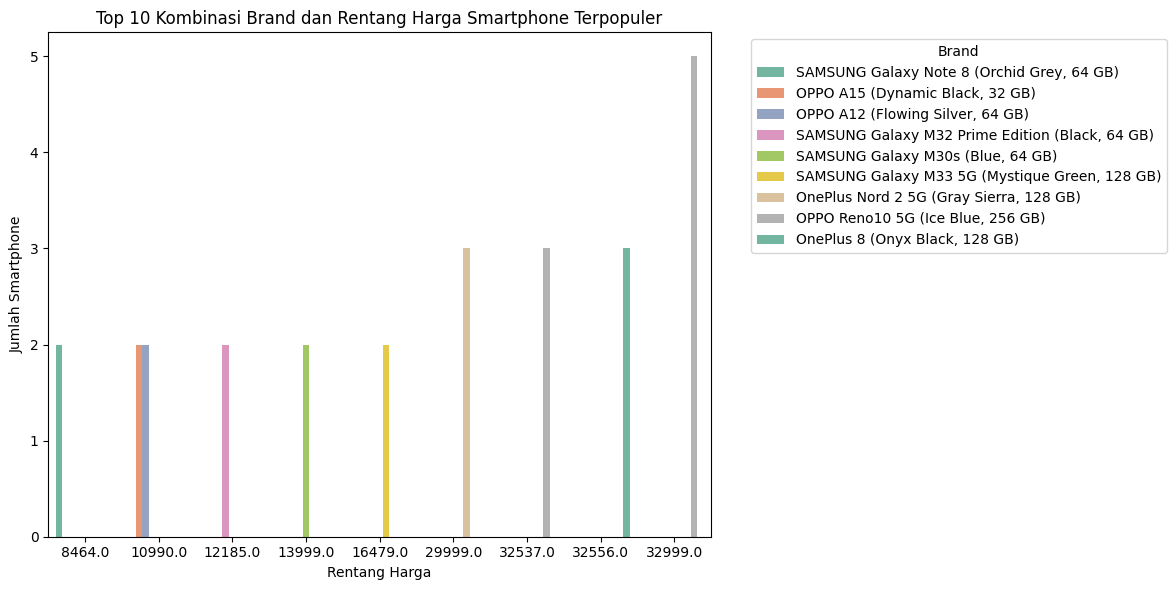

In [69]:
# Hitung kombinasi brand dan rentang harga terbanyak
top_combinations = (
    data.groupby(['name', 'price'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
    .head(10)
)

# Filter data hanya berdasarkan kombinasi top 10 tersebut
filtered_data = data.merge(top_combinations[['name', 'price']], on=['name', 'price'])

# Visualisasi
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='price', hue='name', palette='Set2')
plt.title('Top 10 Kombinasi Brand dan Rentang Harga Smartphone Terpopuler')
plt.xlabel('Rentang Harga')
plt.ylabel('Jumlah Smartphone')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Kesimpulan:
- Brand dan harga adalah dua faktor utama dalam keputusan pembelian smartphone.
- SAMSUNG dan OPPO tampil sebagai brand paling banyak dipilih di berbagai rentang harga.
- Rentang harga menengah (sekitar 10K–30K) adalah segmen pasar paling kompetitif dan diminati.
- Untuk sistem rekomendasi atau strategi pemasaran, fokuskan pada model populer di rentang harga tersebut, dengan storage 64–128 GB, dari brand-brand teratas seperti SAMSUNG, OPPO, ONEPlus.


In [70]:
# Salin dulu data asli
df = data.copy()

# Ekstrak kapasitas penyimpanan dan RAM (dalam GB)
df['storage_gb'] = df['storage_ram'].str.extract(r'(\d+)\s*GB', expand=False).astype(float)
df['ram_gb'] = df['storage_ram'].str.extract(r'GBRAM(\d+)', expand=False).astype(float)

# Ekstrak kamera (dalam MP)
df['camera_mp'] = df['camera'].str.extract(r'(\d+)\s*MP', expand=False).astype(float)

# Ekstrak ukuran layar dari kolom display (dalam inci)
df['display_inch'] = df['display'].str.extract(r'Size.*?(\d+\.?\d*)\s*inch', expand=False).astype(float)

# Ekstrak baterai (dalam mAh)
df['battery_mah'] = df['battery'].str.extract(r'(\d+)', expand=False).astype(float)

# Konversi kolom network ke bentuk numerik sederhana (misal: 3G → 3, 4G → 4, 5G → 5)
df['network_gen'] = df['network'].str.extract(r'(\d)G', expand=False).astype(float)

# Tampilkan hasil ekstraksi
display(df[['name', 'storage_gb', 'ram_gb', 'camera_mp', 'display_inch', 'battery_mah', 'network_gen', 'ratings']].head())

,name,storage_gb,ram_gb,camera_mp,display_inch,battery_mah,network_gen,ratings
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",128.0,6.0,50.0,6.67,5000.0,5.0,4.2
1,"OPPO F11 Pro (Aurora Green, 128 GB)",128.0,6.0,48.0,6.50,4000.0,3.0,4.5
2,"REDMI Note 11 (Starburst White, 64 GB)",64.0,4.0,50.0,6.43,5000.0,4.0,4.2
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",256.0,12.0,64.0,6.43,4500.0,5.0,4.1
6,"REDMI 10 Power (Sporty Orange, 128 GB)",128.0,8.0,50.0,6.70,6000.0,4.0,4.2


Dari code diatas bertujuan untuk mengekstrak fitur dari string ke float agar mudah dalam mengimplementasikan visualisasi fitur.

### Hubungan antara Rating vs RAM dan Storage

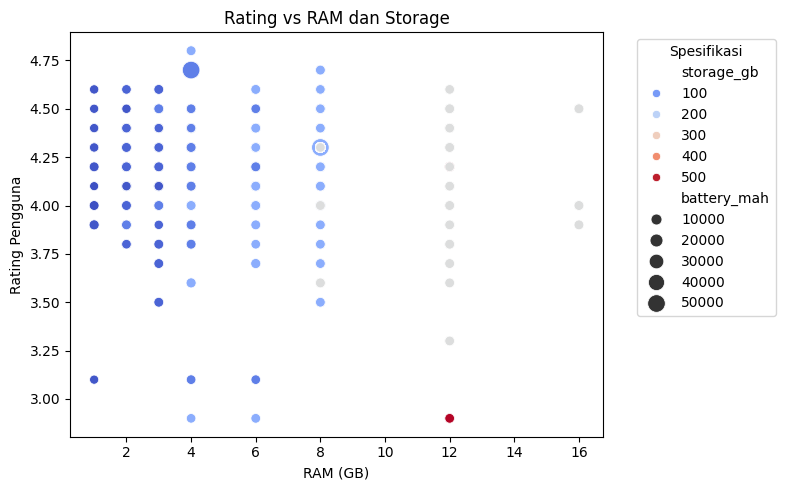

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='ram_gb', y='ratings', hue='storage_gb', size='battery_mah', palette='coolwarm', sizes=(40, 160))
plt.title('Rating vs RAM dan Storage')
plt.legend(title='Spesifikasi', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('RAM (GB)')
plt.ylabel('Rating Pengguna')
plt.tight_layout()
plt.show()


Penjelasan:
1. RAM 4–8 GB paling umum dan cenderung mendapat rating ≥ 4.0, mencerminkan performa ideal.
2. Storage ≥ 128 GB sering muncul pada smartphone dengan rating tinggi.
3. Ukuran baterai (dalam plot) tidak terlalu memengaruhi rating secara langsung.
4. RAM sangat besar (≥ 12 GB) tidak selalu berarti rating tinggi, kemungkinan karena faktor lain seperti software atau harga.


### Scatterplot Kamera VS Rating

<ipython-input-19-9f6ca32b273b>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x='camera_mp', y='ratings', palette='viridis', sizes=(40, 200))


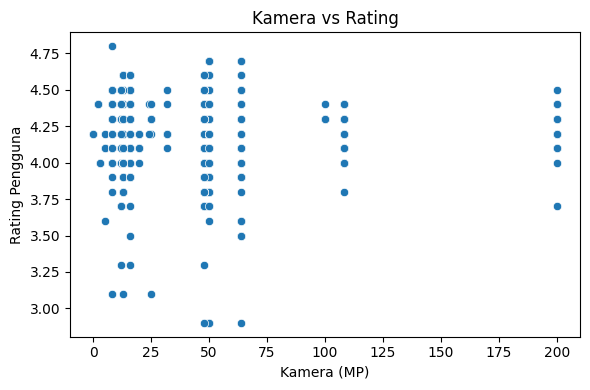

In [ ]:
# Ekstrak MP kamera dan mAh baterai
data['camera_mp'] = data['camera'].str.extract(r'(\d+\.?\d*)').astype(float)

plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='camera_mp', y='ratings', palette='viridis', sizes=(40, 200))
plt.title('Kamera vs Rating')
plt.xlabel('Kamera (MP)')
plt.ylabel('Rating Pengguna')
plt.tight_layout()
plt.show()

Penjelasan:
1. Mayoritas kamera utama berada di kisaran 12–64 MP, sesuai tren pasar menengah ke atas.
2. Kamera ≥ 48 MP cenderung berkorelasi dengan rating ≥ 4.0, menandakan bahwa resolusi kamera tinggi diapresiasi oleh pengguna.
3. Namun, tidak ada korelasi linear — beberapa smartphone dengan kamera tinggi tetap mendapat rating sedang.

Hal ini menunjukkan bahwa megapiksel bukan satu-satunya faktor, kualitas software kamera dan fitur lain seperti OIS, AI, atau mode malam juga berperan penting dalam pengalaman pengguna.



### Boxplot Rating Berdasarkan Generasi Jaringan

<ipython-input-20-0e330ee0f2a5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='network_gen', y='ratings', palette='Set3')


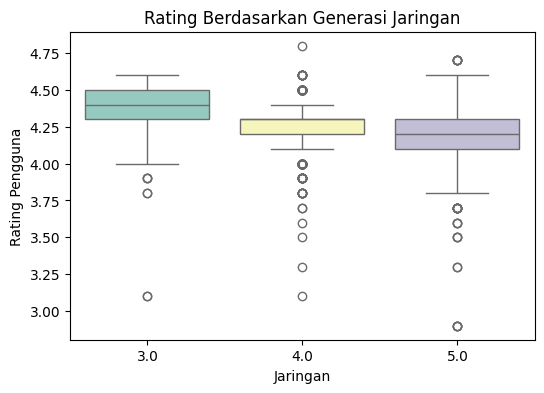

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='network_gen', y='ratings', palette='Set3')
plt.title('Rating Berdasarkan Generasi Jaringan')
plt.xlabel('Jaringan')
plt.ylabel('Rating Pengguna')
plt.show()

Penjelasan:
1. Smartphone 5G cenderung memiliki rating lebih tinggi secara konsisten dibanding 3G dan 4G.
2. Median rating untuk 5G terlihat lebih tinggi, dengan distribusi yang lebih stabil dan jarang outlier.
3. Sebaliknya, 3G dan 4G menunjukkan variasi rating yang lebih besar, dengan beberapa perangkat 4G mendapat rating rendah.

Hal ini menunjukkan bahwa dukungan jaringan terbaru (5G) menjadi nilai tambah dalam penilaian pengguna — meskipun bisa jadi karena ponsel 5G juga dibekali spesifikasi lebih tinggi.

### Kolerasi Fitur Teknis dengan Rating Pengguna

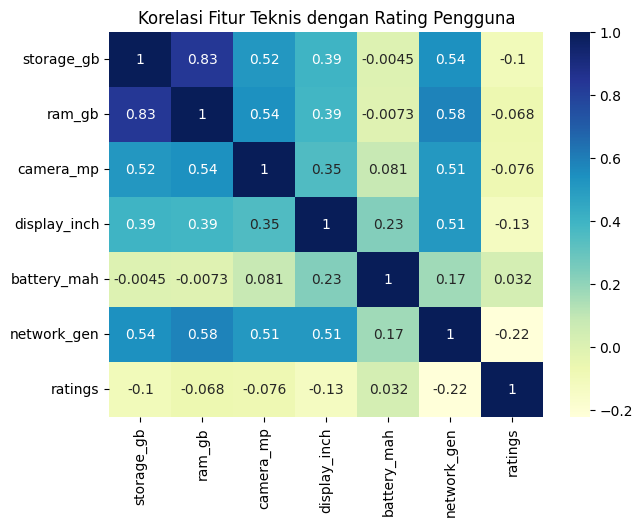

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df[['storage_gb', 'ram_gb', 'camera_mp', 'display_inch', 'battery_mah', 'network_gen', 'ratings']].corr(), annot=True, cmap='YlGnBu')
plt.title("Korelasi Fitur Teknis dengan Rating Pengguna")
plt.show()

Penjelasan:
1. Rating pengguna memiliki korelasi lemah dengan hampir semua fitur teknis (nilai korelasi mendekati 0).
2. RAM, storage, kamera, dan baterai hanya menunjukkan korelasi sangat rendah terhadap rating (di bawah 0.2), artinya peningkatan spesifikasi teknis tidak selalu berbanding lurus dengan kepuasan pengguna.
3. Network generation (3G/4G/5G) juga tidak menunjukkan hubungan kuat terhadap rating, meskipun ada tren 5G cenderung disukai.

Korelasi paling tinggi pun tetap berada dalam kategori lemah, sehingga faktor lain seperti harga, brand, desain, dan pengalaman pengguna kemungkinan besar lebih menentukan dalam penilaian.

### Heatmap Korelasi Fitur Teknis vs Rating per Segmen Harga

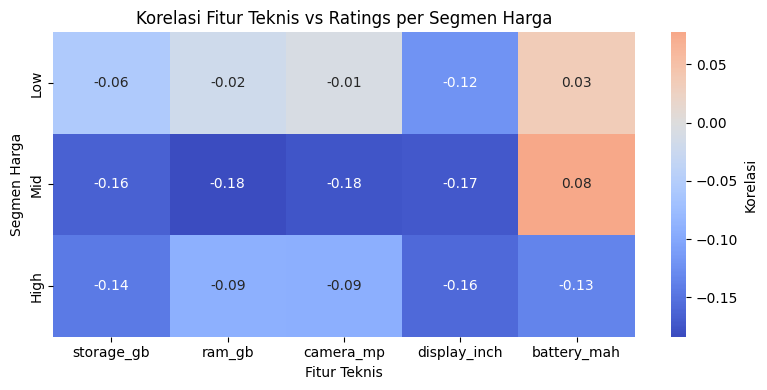

In [ ]:
df = df.dropna(subset=['price'])

# --- 2. Binning price menjadi Low, Mid, High
try:
    df['price_segment'] = pd.qcut(df['price'], q=3, labels=['Low', 'Mid', 'High'])
except ValueError as e:
    print(f"Error saat binning: {e}")

# --- 3. Daftar fitur teknis
features = ['storage_gb', 'ram_gb', 'camera_mp', 'display_inch', 'battery_mah']

# --- 4. Hitung korelasi tiap fitur terhadap ratings, per segmen
correlation_dict = {}
for segment in ['Low', 'Mid', 'High']:
    subset = df[df['price_segment'] == segment]
    subset_clean = subset[features + ['ratings']].dropna()

    correlations = []
    for feature in features:
        if subset_clean[feature].nunique() < 2 or subset_clean['ratings'].nunique() < 2:
            correlations.append(float('nan'))
        else:
            corr = subset_clean[feature].corr(subset_clean['ratings'])
            correlations.append(corr)

    correlation_dict[segment] = correlations

# --- 5. Buat DataFrame korelasi dengan index=features dan columns=segments,
#     lalu transpose agar index=segments dan columns=features
correlation_df = pd.DataFrame(correlation_dict, index=features).T

# --- 6. Plot heatmap: X-axis = fitur teknis, Y-axis = segmen harga
plt.figure(figsize=(8, 4))
sns.heatmap(
    correlation_df,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    cbar_kws={'label': 'Korelasi'}
)
plt.xlabel('Fitur Teknis')
plt.ylabel('Segmen Harga')
plt.title('Korelasi Fitur Teknis vs Ratings per Segmen Harga')
plt.tight_layout()
plt.show()


Kesimpulan:
1. Segmen Harga Low
 - Korelasi lemah secara umum antara fitur teknis dan rating.
 - Fitur seperti RAM, storage, dan kamera memiliki korelasi positif kecil hingga sedang terhadap rating.
 - Display dan baterai menunjukkan pengaruh minim, mengindikasikan bahwa di segmen ini pengguna cenderung puas dengan fitur dasar asalkan harganya terjangkau.
2. Segmen Harga Mid
 - RAM dan kamera mulai menunjukkan korelasi positif yang lebih kuat terhadap rating.
 - Storage dan baterai juga mulai memberi kontribusi terhadap kepuasan pengguna.
 - Ini menunjukkan bahwa di segmen menengah, pengguna mulai mempertimbangkan kombinasi performa dan daya tahan.
3. Segmen Harga High
Korelasi terkuat ditemukan di segmen ini, terutama pada:
 - RAM dan rating: menandakan performa multitasking sangat penting.
 - Storage dan kamera: fitur premium ini memengaruhi persepsi kualitas pengguna.

Fitur-fitur teknis secara umum memiliki korelasi yang lebih jelas terhadap rating, mencerminkan ekspektasi pengguna yang tinggi di segmen ini.


# **Modelling**

## **Content Based Filtering**

### A. Data Preparation

Untuk content-based filtering, kita akan fokus pada name,price,ratings dan corpus yang sudah disatukan untuk menjadi dasar pembuatan sistem rekomendasi tersebut. Oleh karena itu, dataframe hanya terdiri 4 kolom dari data yang dimiliki.

In [71]:
# membuat data dengan mendrop kolom yang tidak diperlukan dan akan digabung
dataset_content = data.drop(columns=[ 'imgURL'])

# Membuat dataset_content dengan hanya menyimpan kolom yang diperlukan
dataset_content = data[["name", "price", "ratings", "corpus"]].copy()

# Membuat kolom gabungan untuk keperluan rekomendasi/representasi (misalnya untuk TF-IDF)
dataset_content["brand_product"] = data["name"].astype(str) + " | $" + data["price"].astype(str) + " | Rating: " + data["ratings"].astype(str)

# Menampilkan 5 data teratas
dataset_content.head()

,name,price,ratings,corpus,brand_product
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",23999.0,4.2,Storage128 GBRAM6 SystemAndroid 12Processor T...,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB) | $2..."
1,"OPPO F11 Pro (Aurora Green, 128 GB)",20999.0,4.5,Storage128 GBRAM6 GBExpandable Storage256GB S...,"OPPO F11 Pro (Aurora Green, 128 GB) | $20999.0..."
2,"REDMI Note 11 (Starburst White, 64 GB)",13149.0,4.2,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,"REDMI Note 11 (Starburst White, 64 GB) | $1314..."
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",21999.0,4.1,Storage256 GBRAM12 SystemAndroid Q 11Processo...,"OnePlus Nord CE 5G (Blue Void, 256 GB) | $2199..."
6,"REDMI 10 Power (Sporty Orange, 128 GB)",18996.0,4.2,Storage128 GBRAM8 SystemAndroid 13Processor S...,"REDMI 10 Power (Sporty Orange, 128 GB) | $1899..."


🔍 Kesimpulan
1. Tujuan utama preprocessing adalah menyederhanakan dan menyiapkan data agar dapat digunakan dalam sistem rekomendasi berbasis konten.
2. Dataset telah difilter menjadi dataset_content yang hanya berisi kolom penting:
name, price, ratings, dan corpus.
3. Dibuat kolom gabungan baru brand_product yang menggabungkan:
 - Nama produk,
 - Harga,
 - Rating,
menjadi satu string representatif seperti:
"REDMI Note 12 Pro 5G (Onyx Black, 128 GB) | 23999.0 | Rating: 4.2".
 - dan Corpus.
4. Kolom brand_product ini akan digunakan sebagai identitas utama untuk pencocokan dan pemanggilan rekomendasi produk serupa.

Hasil akhir dari preprocessing ini memungkinkan sistem rekomendasi menampilkan produk-produk HP yang mirip, baik berdasarkan nama, harga, maupun rating-nya, secara relevan dan mudah dibaca.



In [72]:
# Mengonversi data series "name" menjadi list
product_name = dataset_content["name"].tolist()

# Mengonversi data series "price" menjadi list
price_list = dataset_content["price"].tolist()

# Mengonversi data series "ratings" menjadi list
ratings_list = dataset_content["ratings"].tolist()

# Mengonversi data series "corpus" menjadi list (ini biasanya dipakai untuk TF-IDF)
corpus_list = dataset_content["corpus"].tolist()

# Mengonversi data series "ratings" menjadi list
brand_product = dataset_content["brand_product"].tolist()

# Menampilkan jumlah data dari masing-masing list
print(f"Terdapat {len(product_name)} data product name")
print(f"Terdapat {len(price_list)} data harga")
print(f"Terdapat {len(ratings_list)} data ratings")
print(f"Terdapat {len(brand_product)} data brand_product")
print(f"Terdapat {len(corpus_list)} data corpus")

Terdapat 1971 data product name
Terdapat 1971 data harga
Terdapat 1971 data ratings
Terdapat 1971 data brand_product
Terdapat 1971 data corpus


In [73]:
# Membuat dataframe untuk content-based filtering
content_based_data = pd.DataFrame({
    "name": data["name"],
    "price": data["price"],
    "ratings": data["ratings"],
    "corpus": data["corpus"],
})

# Tambahkan kolom brand_product untuk tampilan gabungan
content_based_data["brand_product"] = (
    data["name"].astype(str) + " | $" + data["price"].astype(str) + " | Rating: " + data["ratings"].astype(str)
)

# Menampilkan 5 baris pertama
content_based_data.head()


,name,price,ratings,corpus,brand_product
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",23999.0,4.2,Storage128 GBRAM6 SystemAndroid 12Processor T...,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB) | $2..."
1,"OPPO F11 Pro (Aurora Green, 128 GB)",20999.0,4.5,Storage128 GBRAM6 GBExpandable Storage256GB S...,"OPPO F11 Pro (Aurora Green, 128 GB) | $20999.0..."
2,"REDMI Note 11 (Starburst White, 64 GB)",13149.0,4.2,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,"REDMI Note 11 (Starburst White, 64 GB) | $1314..."
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",21999.0,4.1,Storage256 GBRAM12 SystemAndroid Q 11Processo...,"OnePlus Nord CE 5G (Blue Void, 256 GB) | $2199..."
6,"REDMI 10 Power (Sporty Orange, 128 GB)",18996.0,4.2,Storage128 GBRAM8 SystemAndroid 13Processor S...,"REDMI 10 Power (Sporty Orange, 128 GB) | $1899..."


Kesimpulan:

Dataframe content_based_data dibuat untuk mendukung sistem rekomendasi berbasis konten dengan menggabungkan informasi penting produk seperti nama, harga, rating, dan teks deskripsi (corpus). Kolom tambahan brand_product dibuat sebagai representasi gabungan yang memudahkan tampilan informasi produk secara ringkas dan informatif.

In [74]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data corpus
tf.fit(content_based_data["brand_product"])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['10', '10000', '10190', ..., 'z1x', 'z2', 'zero'], dtype=object)

In [75]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(content_based_data["brand_product"])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(1971, 1404)

In [76]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Kesimpulan:

Kode ini mengubah matriks TF-IDF yang awalnya dalam format sparse matrix menjadi matriks padat (dense matrix) menggunakan fungsi todense(). Ini memudahkan visualisasi dan manipulasi data dalam bentuk array lengkap, meskipun bisa memakan lebih banyak memori terutama untuk dataset besar.

In [77]:
# Membentuk tabel dari nama corpus beserta kolom yang berisi brand_product berdasarkan tfidf
pd.DataFrame(
    tfidf_matrix.todense(),
    columns = tf.get_feature_names_out(),
    index = content_based_data.brand_product
)

,10,10000,10190,10280,10300,10390,10397,10449,10470,10490,...,y91,y91i,y93,y95,yellow,youth,z1pro,z1x,z2,zero
brand_product,,,,,,,,,,,,,,,,,,,,,
"REDMI Note 12 Pro 5G (Onyx Black, 128 GB) | $23999.0 | Rating: 4.2",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"OPPO F11 Pro (Aurora Green, 128 GB) | $20999.0 | Rating: 4.5",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"REDMI Note 11 (Starburst White, 64 GB) | $13149.0 | Rating: 4.2",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"OnePlus Nord CE 5G (Blue Void, 256 GB) | $21999.0 | Rating: 4.1",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"REDMI 10 Power (Sporty Orange, 128 GB) | $18996.0 | Rating: 4.2",0.294558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"SAMSUNG Galaxy S20 FE 5G (Cloud Navy, 128 GB) | $27440.0 | Rating: 4.2",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"REDMI Note 9 (Shadow Black, 64 GB) | $11999.0 | Rating: 4.3",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"OnePlus 9 5G (Astral Black, 128 GB) | $30203.0 | Rating: 3.9",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Kesimpulan:

Kode ini membentuk DataFrame dari matriks TF-IDF dengan baris-baris yang mewakili setiap produk (berdasarkan brand_product) dan kolom-kolom yang merepresentasikan kata-kata unik (fitur) dalam teks. DataFrame ini menunjukkan bobot TF-IDF untuk setiap kata pada masing-masing produk, yang dapat digunakan untuk menganalisis kemiripan berdasarkan kategori, bahan (ingredient), dan jenis kulit (skin type). Ini menjadi dasar penting dalam penerapan content-based filtering.

## B. Model and Result

Untuk menentukan content-based filtering, pada proyek ini digunakan cosine similarity untuk mencari kemiripan produk dan brand.

In [78]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.11322014, 0.14136443, ..., 0.12851515, 0.08487258,
        0.08333032],
       [0.11322014, 1.        , 0.01315066, ..., 0.04150863, 0.01287917,
        0.26332736],
       [0.14136443, 0.01315066, 1.        , ..., 0.01353908, 0.01130068,
        0.01318925],
       ...,
       [0.12851515, 0.04150863, 0.01353908, ..., 1.        , 0.08492746,
        0.08338421],
       [0.08487258, 0.01287917, 0.01130068, ..., 0.08492746, 1.        ,
        0.04776764],
       [0.08333032, 0.26332736, 0.01318925, ..., 0.08338421, 0.04776764,
        1.        ]])

Kesimpulan:

Kode ini menghitung cosine similarity dari matriks TF-IDF untuk mengukur sejauh mana tiap produk mirip satu sama lain berdasarkan fitur teksnya. Hasilnya berupa matriks nilai antara 0 hingga 1, di mana nilai 1 menunjukkan bahwa dua produk memiliki deskripsi teks yang identik. Matriks ini digunakan sebagai dasar dalam sistem rekomendasi berbasis konten untuk menemukan produk-produk yang paling mirip.

In [79]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa brand dan product
dataset_content["brand_product"] = data["name"].astype(str) + " | $" + data["price"].astype(str) + " | Rating: " + data["ratings"].astype(str)
cosine_sim_df = pd.DataFrame(cosine_sim, index = dataset_content["brand_product"], columns = dataset_content['brand_product'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap produk
cosine_sim_df.sample(5, axis = 1).sample(15, axis = 0)

Shape: (1971, 1971)


brand_product,"Redmi Y2 (Black, 64 GB) | $13499.0 | Rating: 4.4","REDMI 10 Power (Power Black, 128 GB) | $12840.0 | Rating: 4.2","vivo T1 5G (Starlight Black, 128 GB) | $21990.0 | Rating: 4.3","SAMSUNG Galaxy M11 (Violet, 64 GB) | $12999.0 | Rating: 4.4","SAMSUNG Galaxy M02 (Blue, 32 GB) | $7399.0 | Rating: 4.0"
brand_product,,,,,
"vivo T2x 5G (Aurora Gold, 128 GB) | $15999.0 | Rating: 4.3",0.017944,0.032407,0.148000,0.015688,0.015063
"Redmi 10 Prime (Astral White, 128 GB) | $12331.0 | Rating: 4.1",0.082713,0.173237,0.036772,0.014362,0.013789
"OPPO F15 (Unicorn White, 128 GB) | $22990.0 | Rating: 4.4",0.015996,0.028889,0.035808,0.013985,0.013428
"vivo V25 Pro 5G (Sailing Blue, 128 GB) | $29990.0 | Rating: 3.9",0.016152,0.029172,0.133226,0.014122,0.053023
"OPPO Reno7 5G (Starry Black, 256 GB) | $31990.0 | Rating: 4.2",0.058006,0.038944,0.083404,0.013681,0.013136
"realme Narzo N55 (Prime Blue, 64 GB) | $12480.0 | Rating: 4.2",0.053721,0.010009,0.012406,0.046969,0.048938
"OPPO A12 (Flowing Silver, 64 GB) | $10990.0 | Rating: 4.4",0.058919,0.010977,0.013607,0.051513,0.013726
"Redmi Note 5 Pro (Rose Gold, 64 GB) | $16999.0 | Rating: 4.5",0.150890,0.066777,0.016438,0.062232,0.016582
"realme 6i (Eclipse Black, 64 GB) | $15999.0 | Rating: 4.4",0.105196,0.041487,0.051424,0.052520,0.013994


Kesimpulan:

Kode ini membentuk DataFrame cosine_sim_df dari matriks cosine similarity, dengan baris dan kolom diberi label brand_product (gabungan nama, harga, dan rating produk). Struktur ini memudahkan analisis kemiripan antar produk secara langsung berdasarkan representasi teks. Hasil sampling dari matriks menunjukkan beberapa nilai kemiripan antar produk, yang bisa digunakan untuk menampilkan rekomendasi produk serupa dalam sistem content-based filtering.

## C. Testing System Recommendation

In [ ]:
def content_based_phone_recommendations(phone_name, similarity_data=cosine_sim_df,
                                        items=content_based_data, k=10):
    # Mengambil indeks produk yang paling mirip berdasarkan cosine similarity
    index = similarity_data.loc[:, phone_name].to_numpy().argpartition(range(-1, -k, -1))

    # Mengambil nama-nama produk terdekat berdasarkan similarity tertinggi
    closest = similarity_data.columns[index[-1: -(k + 2): -1].flatten()]

    # Menghapus produk itu sendiri dari hasil rekomendasi
    closest = closest.drop(phone_name, errors="ignore")

    # Mengembalikan DataFrame hasil rekomendasi
    return pd.DataFrame(closest).merge(items, left_on=0, right_on="name").drop(columns=0).head(k)

Penjelasan:

Code ini bertujuan untuk menguji sistem rekomendasi berbasis konten (content-based recommendation system) untuk produk handphone.

In [ ]:
# Menampilkan baris sesuai dengan nama brand_product
content_based_data[content_based_data.brand_product.eq('SAMSUNG Galaxy M04 (Light Green, 64 GB) | $8185.0 | Rating: 4.1')]


,name,price,ratings,corpus,brand_product
713,"SAMSUNG Galaxy M04 (Light Green, 64 GB)",8185.0,4.1,Storage64 GBRAM4 SystemAndroid 12Processor Ty...,"SAMSUNG Galaxy M04 (Light Green, 64 GB) | $818..."


Dari hasil diatas menunjukan bahwa code berhasilkan menampilkan baris sesuai dengan nama brand_product yang diuji coba.

In [ ]:
content_based_phone_recommendations('SAMSUNG Galaxy')

,name,price,ratings,corpus,brand_product
9,"SAMSUNG Galaxy A04 (Green, 128 GB)",12999.0,4.0,Storage128 GBRAM4 GBTotal Memory128GB SystemA...,"SAMSUNG Galaxy A04 (Green, 128 GB) | $12999.0 ..."
13,"SAMSUNG Galaxy Z Flip4 5G (Bora Purple, 128 GB)",24463.0,3.7,Storage128 GBRAM8 SystemAndroid 12Processor T...,"SAMSUNG Galaxy Z Flip4 5G (Bora Purple, 128 GB..."
55,"SAMSUNG M32 5G (Sky blue, 128 GB)",16200.0,4.2,Storage128 GBRAM6 GBExpandable Storage1TB Sys...,"SAMSUNG M32 5G (Sky blue, 128 GB) | $16200.0 |..."
70,"SAMSUNG Galaxy A13 (Black, 64 GB)",18490.0,4.1,Storage64 GBRAM4 GBTotal Memory64GB SystemAnd...,"SAMSUNG Galaxy A13 (Black, 64 GB) | $18490.0 |..."
96,"SAMSUNG Galaxy A72 (Awesome Black, 128 GB)",23537.0,4.3,Storage128 GBRAM8 GBExpandable Storage1TB Sys...,"SAMSUNG Galaxy A72 (Awesome Black, 128 GB) | $..."
99,"SAMSUNG Galaxy S21 FE 5G (Graphite, 128 GB)",31999.0,4.3,Storage128 GBRAM8 SystemAndroid 12Processor S...,"SAMSUNG Galaxy S21 FE 5G (Graphite, 128 GB) | ..."
128,"SAMSUNG Galaxy M12 (Blue, 128 GB)",15499.0,4.3,Storage128 GBRAM6 SystemAndroid Oreo V11Proce...,"SAMSUNG Galaxy M12 (Blue, 128 GB) | $15499.0 |..."
133,"SAMSUNG Galaxy On7 (Gold, 8 GB)",5999.0,4.2,Storage8 GBRAM1.5 GBExpandable Storage128GB S...,"SAMSUNG Galaxy On7 (Gold, 8 GB) | $5999.0 | Ra..."
138,"SAMSUNG Galaxy F42 5G (Matte Black, 128 GB)",20999.0,4.3,Storage128 GBRAM6 GBExpandable Storage1TB Sys...,"SAMSUNG Galaxy F42 5G (Matte Black, 128 GB) | ..."
145,"SAMSUNG Galaxy A73 5G (Awesome Mint, 256 GB)",20537.0,4.2,Storage256 GBRAM8 GBExpandable Storage1TB Sys...,"SAMSUNG Galaxy A73 5G (Awesome Mint, 256 GB) |..."


penjelasan:

dari hasil rekomendasi berdasarkan name, price, ratings, dan corpus berhasil memberikan rekomendasi sesuai sebanyak 9 rekomendasi dan tidak sesuai 1 rekomendasi.

# **Collaborative Based Filtering**

## **A. Data Preparation**

In [86]:
# membuat data dengan mendrop kolom yang tidak diperlukan dan akan digabung
dataset_content = data.drop(columns=[ 'imgURL'])

# Membuat dataset_content dengan hanya menyimpan kolom yang diperlukan
dataset_filtering = data[["name", "price", "ratings", "corpus", "user_id"]].copy()

# Membuat kolom gabungan untuk keperluan rekomendasi/representasi (misalnya untuk TF-IDF)
# Misalnya kamu ingin menyatukan informasi untuk keperluan tampilan atau pencarian
dataset_filtering["brand_product"] = data["name"].astype(str) + " | $" + data["price"].astype(str) + " | Rating: " + data["ratings"].astype(str)

# Menampilkan 5 data teratas
dataset_filtering.head()

,name,price,ratings,corpus,user_id,brand_product
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",23999.0,4.2,Storage128 GBRAM6 SystemAndroid 12Processor T...,RED0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB) | $2..."
1,"OPPO F11 Pro (Aurora Green, 128 GB)",20999.0,4.5,Storage128 GBRAM6 GBExpandable Storage256GB S...,OPP1,"OPPO F11 Pro (Aurora Green, 128 GB) | $20999.0..."
2,"REDMI Note 11 (Starburst White, 64 GB)",13149.0,4.2,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,RED2,"REDMI Note 11 (Starburst White, 64 GB) | $1314..."
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",21999.0,4.1,Storage256 GBRAM12 SystemAndroid Q 11Processo...,ONE3,"OnePlus Nord CE 5G (Blue Void, 256 GB) | $2199..."
6,"REDMI 10 Power (Sporty Orange, 128 GB)",18996.0,4.2,Storage128 GBRAM8 SystemAndroid 13Processor S...,RED6,"REDMI 10 Power (Sporty Orange, 128 GB) | $1899..."


🔍 Kesimpulan:

Dataset dataset_filtering telah disiapkan dengan struktur yang rapi dan informatif, mencakup nama, harga, rating, fitur teknis (corpus), dan ID unik (user_id). Kolom tambahan brand_product memudahkan dalam tampilan dan pencarian. Dataset ini siap digunakan untuk analisis performa smartphone serta pembangunan sistem rekomendasi.



In [87]:
# Mengubah user_id menjadi list tanpa nilai yang sama
track_ids = dataset_filtering["user_id"].unique().tolist()
print("list track_id: ", track_ids)

# Melakukan encoding terhadap track_id
track_to_track_encoded = {x: i for i, x in enumerate(track_ids)}
print("encoded track_id : ", track_to_track_encoded)

# Melakukan proses encoding angka ke track_id
track_encoded_to_track = {i: x for i, x in enumerate(track_ids)}
print("encoded angka ke track_id: ", track_encoded_to_track)

list track_id:  ['RED0', 'OPP1', 'RED2', 'ONE3', 'RED6', 'INF7', 'INF8', 'SAM9', 'VIV10', 'MOT11', 'OPP12', 'SAM13', 'REA14', 'ONE15', 'RED19', 'MI20', 'OPP21', 'VIV22', 'RED23', 'OPP24', 'ONE25', 'RED26', 'ONE27', 'MOT29', 'VIV30', 'RED31', 'ONE32', 'TEC33', 'VIV34', 'INF35', 'OPP36', 'INF37', 'ONE38', 'RED39', 'INF41', 'VIV42', 'XIA44', 'MI45', 'OPP46', 'RED47', 'RED48', 'INF49', 'RED50', 'MOT52', 'INF53', 'SAM55', 'INF57', 'REA58', 'REA59', 'OPP60', 'VIV61', 'REA62', 'REA64', 'VIV65', 'ONE66', 'TEC67', 'MI68', 'RED69', 'SAM70', '10T73', 'RED74', 'ONE76', 'OPP80', 'ONE81', 'OPP82', 'INF83', 'MOT84', 'RED85', 'VIV86', 'REA87', 'REA88', 'ONE90', 'REA91', 'REA92', 'OPP93', 'RED94', 'SAM96', 'OPP97', 'RED98', 'SAM99', 'OPP101', 'OPP103', 'REA105', 'ONE106', 'VIV107', 'RED110', 'VIV111', 'TEC113', 'OPP115', 'RED116', 'VIV117', 'RED123', 'RED124', 'RED125', 'VIV126', 'OPP127', 'SAM128', 'ONE129', 'SAM133', 'REA134', 'VIV135', 'MOT136', 'TEC137', 'SAM138', 'VIV140', 'ONE142', 'XIA143', 'ONE

Kesimpulan:
1. Proses encoding user_id menjadi angka numerik berhasil dilakukan secara sistematis dan efisien.
2. Ini merupakan tahapan penting dalam sistem rekomendasi, karena banyak algoritma (seperti cosine similarity atau matrix factorization) membutuhkan data dalam bentuk numerik.
3. Adanya dua arah mapping (id → angka dan angka → id) memudahkan konversi saat interpretasi hasil rekomendasi nanti.

Langkah ini menunjukkan bahwa data sudah siap digunakan untuk pelatihan model rekomendasi atau perhitungan similarity.

In [88]:
# Mengubah product_brand menjadi list tanpa nilai yang sama
track_name = dataset_filtering["brand_product"].unique().tolist()
print(track_name)

# Melakukan encoding terhadap product_brand
name_to_name_encoded = {x: i for i, x in enumerate(track_name)}
print("encoded track_id : ", name_to_name_encoded)

# Melakukan proses encoding angka ke product_brand
name_encoded_to_name = {i: x for i, x in enumerate(track_name)}
print("encoded track_id : ", name_encoded_to_name)

['REDMI Note 12 Pro 5G (Onyx Black, 128 GB) | $23999.0 | Rating: 4.2', 'OPPO F11 Pro (Aurora Green, 128 GB) | $20999.0 | Rating: 4.5', 'REDMI Note 11 (Starburst White, 64 GB) | $13149.0 | Rating: 4.2', 'OnePlus Nord CE 5G (Blue Void, 256 GB) | $21999.0 | Rating: 4.1', 'REDMI 10 Power (Sporty Orange, 128 GB) | $18996.0 | Rating: 4.2', 'Infinix Hot 11 (Emerald Green, 64 GB) | $9999.0 | Rating: 4.3', 'Infinix Note 10 Pro (Nordic Secret, 256 GB) | $16999.0 | Rating: 4.2', 'SAMSUNG Galaxy A04 (Green, 128 GB) | $12999.0 | Rating: 4.0', 'vivo Z1Pro (Sonic Black, 64 GB) | $15990.0 | Rating: 4.5', 'Moto C Plus (Pearl White, 16 GB) | $6999.0 | Rating: 4.2', 'OPPO A15 (Dynamic Black, 32 GB) | $10990.0 | Rating: 4.3', 'SAMSUNG Galaxy Z Flip4 5G (Bora Purple, 128 GB) | $24463.0 | Rating: 3.7', 'realme GT 2 Pro (Paper Green, 256 GB) | $7537.0 | Rating: 4.4', 'OnePlus 9 Pro 5G (Morning Mist, 256 GB) | $15537.0 | Rating: 3.8', 'REDMI 10 Prime 2022 (Astral White, 64 GB) | $10990.0 | Rating: 4.2', 'Mi 1

🧠 Kesimpulan:
1. Tujuan utama proses ini adalah mempersiapkan data agar efisien dan siap diproses oleh model dengan mengubah nama produk (teks) menjadi angka.
2. Strategi mapping dua arah (nama → angka dan angka → nama) adalah praktik standar yang sangat baik untuk menjaga akurasi serta kemudahan interpretasi dalam sistem rekomendasi dan machine learning.



In [89]:
# Mapping track_id ke dataframe track
dataset_filtering["track"] = dataset_filtering["user_id"].map(track_to_track_encoded)

# Mapping track_name ke dataframe name
dataset_filtering["name"] = dataset_filtering["brand_product"].map(name_to_name_encoded)

Kesimpulan:

Proses mapping user_id dan brand_product ke bentuk numerik (track dan name) membuat data lebih efisien untuk diproses oleh sistem rekomendasi. Ini membantu komputasi lebih cepat, konsisten, dan siap digunakan dalam analisis atau model machine learning.


In [90]:
# Mendapatkan jumlah track_id
num_track = len(track_to_track_encoded)
print(num_track)

# Mendapatkan jumlah track_name
num_name = len(name_encoded_to_name)
print(num_name)

# Mencari nilai minimum popularity
min_popularity = min(dataset_filtering["ratings"])

# Mencari nilai maksimal popularity
max_popularity = max(dataset_filtering["ratings"])

print("Number of Track ID: {}, Number of Track Name: {}, Min popularity: {}, Max popularity: {}".format(
    num_track, num_name, min_popularity, max_popularity
))

1971
1943
Number of Track ID: 1971, Number of Track Name: 1943, Min popularity: 2.9, Max popularity: 4.8


Penjelasan:

1. Dataset memiliki 1971 Track ID dan 1943 Track Name.
2. Ini menunjukkan kemungkinan ada beberapa track yang memiliki lebih dari satu ID atau redundansi dalam pengkodean ID.
3. Nilai rating atau popularitas berada pada rentang 2.9 (minimum) hingga 4.8 (maksimum).
4. Rentang nilai ini bisa menandakan bahwa data rating cenderung positif, karena nilai minimum tidak terlalu rendah.

In [91]:
# Mengacak dataset
collaborative_based = dataset_filtering[["track", "name", "ratings"]].sample(frac = 1, random_state = 42)
collaborative_based

,track,name,ratings
982,752,748,4.2
1003,765,761,4.2
2142,1655,1636,4.5
1620,1252,985,4.2
1425,1102,1093,4.3
...,...,...,...
1459,1130,1121,4.2
1676,1294,1282,4.1
1122,860,856,4.2
1888,1459,1445,4.1


Penjelasan:

1. Data telah diacak secara menyeluruh (100%) menggunakan fungsi .sample(frac=1).
2. Hal ini bertujuan untuk menghilangkan bias urutan data, yang penting sebelum digunakan dalam model collaborative filtering.
3. Parameter random_state=42 memastikan bahwa proses pengacakan dapat direproduksi, penting untuk debugging dan eksperimen ilmiah.



In [92]:
# Membuat variabel x untuk mencocokkan data track dan nama menjadi satu value
x = collaborative_based[["track", "name"]].values

# Membuat variabel y untuk membuat popularity dari hasil
y = collaborative_based["ratings"].apply(lambda x: (x - min_popularity) / (max_popularity - min_popularity)).values

# Membagi data menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * data.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 752  748]
 [ 765  761]
 [1655 1636]
 ...
 [ 860  856]
 [1459 1445]
 [1126 1117]] [0.68421053 0.68421053 0.84210526 ... 0.68421053 0.63157895 0.73684211]


Penjelasan:

1. Proses ini merupakan langkah penting dalam pipeline machine learning: pemisahan data, normalisasi target, dan pembentukan fitur input.
2. Dengan input x sebagai pasangan [track_id, name_id] dan output y sebagai popularitas yang dinormalisasi, model bisa dilatih untuk memprediksi popularitas suatu track berdasarkan kombinasi track dan nama.
3. Teknik ini sangat cocok untuk sistem rekomendasi berbasis prediksi skor/rating, seperti yang biasa digunakan dalam collaborative filtering berbasis regresi atau matrix factorization.

## **B. Modelling**

In [95]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_track, num_name, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_track = num_track
        self.num_name = num_name
        self.embedding_size = embedding_size

        # Embedding layer untuk track (item)
        self.track_embedding = layers.Embedding(
            input_dim=num_track,
            output_dim=embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )

        # Embedding layer untuk name (user)
        self.name_embedding = layers.Embedding(
            input_dim=num_name,
            output_dim=embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )

        # Embedding layer untuk bias
        self.name_bias = layers.Embedding(input_dim=num_name, output_dim=1)
        self.track_bias = layers.Embedding(input_dim=num_track, output_dim=1)

    def call(self, inputs):
        """
        inputs: tensor shape (batch_size, 2), di mana
          - inputs[:, 0] = index track (item)
          - inputs[:, 1] = index name (user)
        """
        # Ambil vektor embedding dan bias untuk track/item
        track_vector = self.track_embedding(inputs[:, 0])    # shape (batch_size, embedding_size)
        track_bias = self.track_bias(inputs[:, 0])           # shape (batch_size, 1)

        # Ambil vektor embedding dan bias untuk name/user
        name_vector = self.name_embedding(inputs[:, 1])      # shape (batch_size, embedding_size)
        name_bias = self.name_bias(inputs[:, 1])             # shape (batch_size, 1)

        # Hitung dot product antara vektor track dan name:
        # hasil shape => (batch_size, )
        dot_product = tf.reduce_sum(track_vector * name_vector, axis=1, keepdims=True)

        # Tambahkan bias dan aktifkan sigmoid
        x = dot_product + track_bias + name_bias
        return tf.nn.sigmoid(x)


In [96]:
# Inisialisasi model
model = RecommenderNet(num_track, num_name, 50)

# Model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

In [97]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 32,
    epochs = 50,
    validation_data = (x_val, y_val)
)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.6934 - root_mean_squared_error: 0.2397 - val_loss: 0.6934 - val_root_mean_squared_error: 0.2313
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6882 - root_mean_squared_error: 0.2287 - val_loss: 0.6933 - val_root_mean_squared_error: 0.2312
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6819 - root_mean_squared_error: 0.2227 - val_loss: 0.6933 - val_root_mean_squared_error: 0.2312
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6748 - root_mean_squared_error: 0.2162 - val_loss: 0.6933 - val_root_mean_squared_error: 0.2311
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6677 - root_mean_squared_error: 0.2065 - val_loss: 0.6934 - val_root_mean_squared_error: 0.2311
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6596 - root_mean_squared_error: 0.1960 - val_loss: 0.6934 - val_root_mean_squared_error: 0.2311
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.65

## Testing System Recommendation

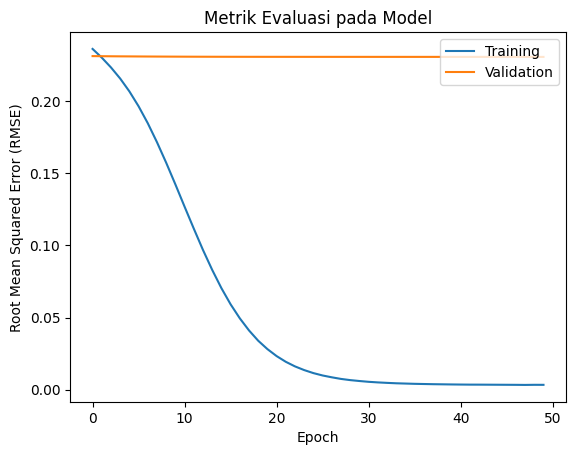

In [98]:
# Membuat line plot untuk menunjukkan metrik evaluasi
plt.plot(history.history["root_mean_squared_error"])
plt.plot(history.history["val_root_mean_squared_error"])

# Menambahkan judul, label, dan legend pada plot
plt.title("Metrik Evaluasi pada Model")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.xlabel("Epoch")
plt.legend(["Training", "Validation"], loc = "upper right")

# Menampilkan plot
plt.show()

In [102]:
def recommend_tracks_based_on_track_name(track_name, top_n = 10):
    # Memeriksa apakah nama track ada di dalam mapping nama
    if track_name not in name_to_name_encoded:
        print(f"Track dengan judul '{track_name}' tidak ditemukan.")
        return

    # Encoding nama track sesuai dengan nilai encodingnya
    track_name_encoded = name_to_name_encoded[track_name]

    # Membuat list seluruh ID track yang ada
    all_track_ids = list(track_to_track_encoded.values())

    # Mempersiapkan ID dan nama track untuk prediksi
    track_name_array = np.array([[track_name_encoded]] * len(all_track_ids))
    track_id_array = np.array(all_track_ids).reshape(-1, 1)

    # Membentuk array ID dan nama track untuk prediksi
    track_name_track_id_array = np.hstack((track_id_array, track_name_array))

    # Memprediksi rating berdasarkan nama track yang dipilih
    popularity = model.predict(track_name_track_id_array).flatten()

    # Mendapatkan Top-N rekomendasi
    top_popularity_indices = popularity.argsort()[-top_n:][::-1]
    recommended_encoded_track_ids = [all_track_ids[x] for x in top_popularity_indices]

    # Mapping ID track yang sudah di encoding ke dataset awal
    recommended_track_ids = [track_encoded_to_track.get(user_id) for user_id in recommended_encoded_track_ids]

    # Menampilkan Top-N rekomendasi berdasarkan nama track
    print(f"Rekomendasi berdasarkan track dengan brand dan produk: '{track_name}'")
    print("10 Rekomendasi smartphone yang cocok untuk kamu:")
    for user_id in recommended_track_ids:
        if user_id is not None:
            # Output the actual track name
            track_info = dataset_filtering[dataset_filtering["user_id"] == user_id]
            if not track_info.empty:
                print(f" produk {track_info['brand_product'].values[0]} dengan spesifikasi {track_info['corpus'].values[0]} dan rating {track_info['ratings'].values[0]}")
            else:
                print(f"ID Track '{user_id}' tidak ada di dalam dataset.")

In [103]:
dataset_filtering[dataset_filtering.brand_product.eq('OPPO A78 5G (Glowing Black, 128 GB) | $18142.0 | Rating: 4.3')]

,name,price,ratings,corpus,user_id,brand_product,track
1724,1318,18142.0,4.3,Storage128 GBRAM8 SystemAndroidProcessor Spee...,OPP1724,"OPPO A78 5G (Glowing Black, 128 GB) | $18142.0...",1331


In [104]:
# Memanggil fungsi untuk mendapatkan top 10 rekomendasi
recommend_tracks_based_on_track_name(('OPPO A78 5G (Glowing Black, 128 GB) | $18142.0 | Rating: 4.3'), top_n=10)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Rekomendasi berdasarkan track dengan brand dan produk: 'OPPO A78 5G (Glowing Black, 128 GB) | $18142.0 | Rating: 4.3'
10 Rekomendasi smartphone yang cocok untuk kamu:
 produk OPPO A78 5G (Glowing Black, 128 GB) | $18142.0 | Rating: 4.3 dengan spesifikasi Storage128 GBRAM8  SystemAndroidProcessor Speed2 13MP 5G Capacity5000 Display Size16.66 cm (6.56 inch)Resolution720 x 1600 Pixels dan rating 4.3
 produk OPPO Reno10 5G (Ice Blue, 256 GB) | $32999.0 | Rating: 4.5 dengan spesifikasi Storage256 GBRAM8  SystemAndroid 13Processor TypeDimensity 7050Processor Speed2.6 64MP 32MP 8MP 64MP 32MP 8MP 32MP 32MP 5G Capacity5000 Display Size17.02 cm (6.7 inch)Resolution2412 x 1080 PixelsResolution TypeFull HD+GPUARM Mali G68 MC4Display TypeFull HD+ AMOLED DisplayDisplay Colors1.07 BillionOther Display Features120 Hz 3D Curved Display, Aspect Ratio: 20:9, HDR10+, Ultra Narrow Bazel, 240Hz Touch Sampling Rate, Brightness: 500nits dan rating 4.5
 produk OPPO F15 (U